# NEURON Simulations Results and Analysis
This notebook contains the commands to generate the plots for the NEURON simulations.

In [1]:
from getData import *
from plot import *

## A) 100 Network

### A.1) Neuronal Distribution

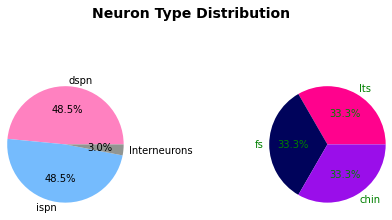

In [2]:
plotNeuronalDistribution('net_100')

### A.2) Random Traces

Plotting the traces of the following neurons :  [91, 51, 74, 6, 9]


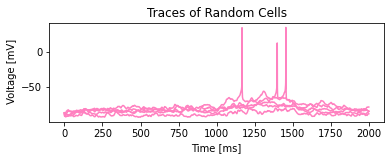

Plotting the traces of the following neurons :  [60, 58, 65, 73, 71]


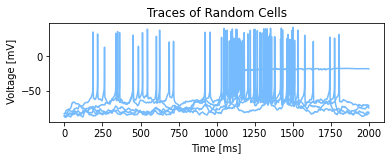

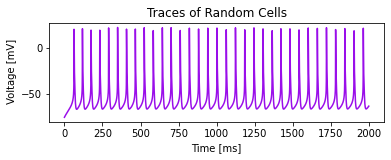

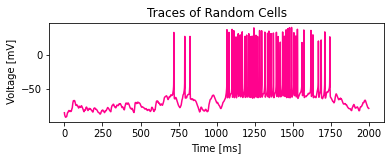

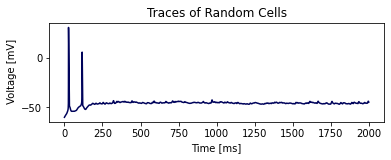

()

In [3]:
plotTraces('net_100','R')

### A.3) Raster Plot

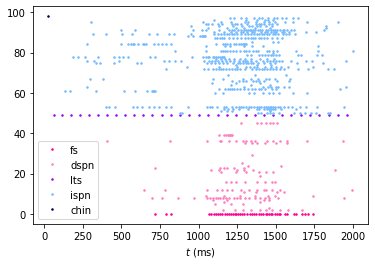

In [4]:
plotRaster('net_100', 100)

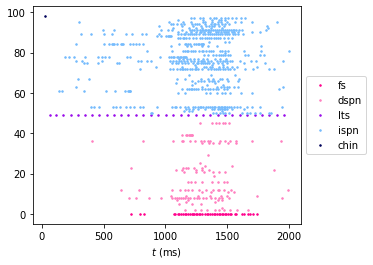

In [2]:
plotRaster('net_100', 100)

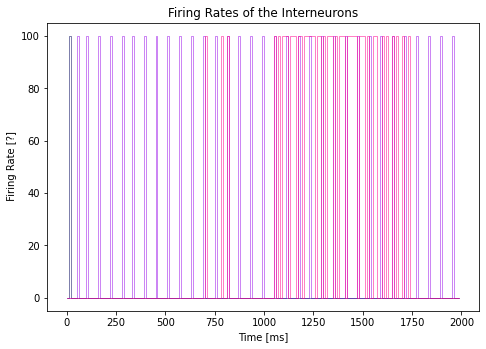

In [6]:
time_100, dspn_fr_100, ispn_fr_100, chin_fr_100, lts_fr_100, fs_fr_100 = FiringRate('net_100')
plotFR_1(time_100, dspn_fr_100, ispn_fr_100, chin_fr_100, lts_fr_100, fs_fr_100)

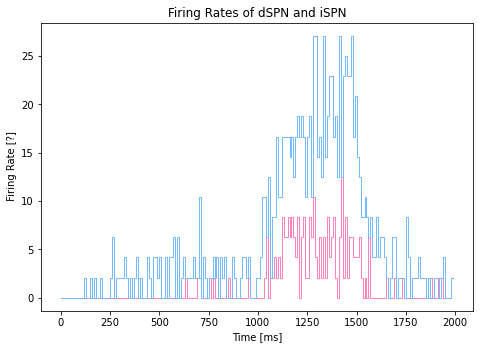

In [9]:
plotFR_2(time_100, dspn_fr_100, ispn_fr_100, chin_fr_100, lts_fr_100, fs_fr_100)

## B. 1000 Network

### B.1) Neuronal Distribution

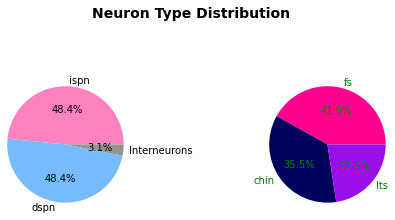

In [5]:
plotNeuronalDistribution('net_1000')

### B.2) Traces

Plotting the traces of the following neurons :  [105, 189, 976, 187, 381]


ValueError: x and y must have same first dimension, but have shapes (3132,) and (4001,)

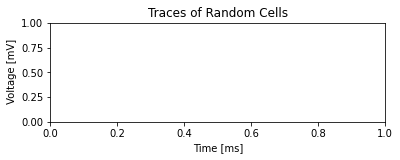

In [17]:
plotTraces('net_1000','R')

### B.3) Raster Plot

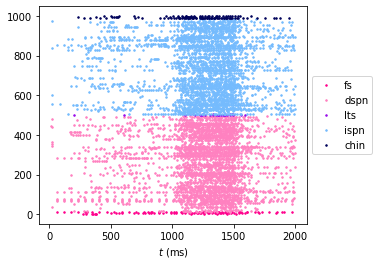

In [3]:
plotRaster('net_1000',1000)

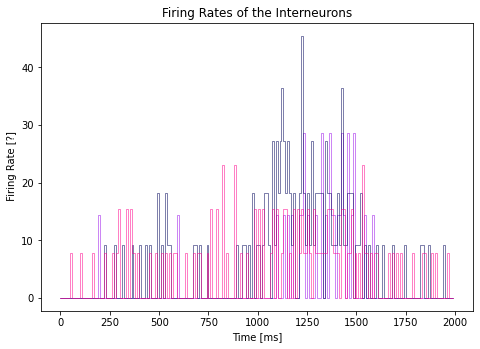

In [10]:
time_1000, dspn_fr_1000, ispn_fr_1000, chin_fr_1000, lts_fr_1000, fs_fr_1000 = FiringRate('net_1000')
plotFR_1(time_1000, dspn_fr_1000, ispn_fr_1000, chin_fr_1000, lts_fr_1000, fs_fr_1000)

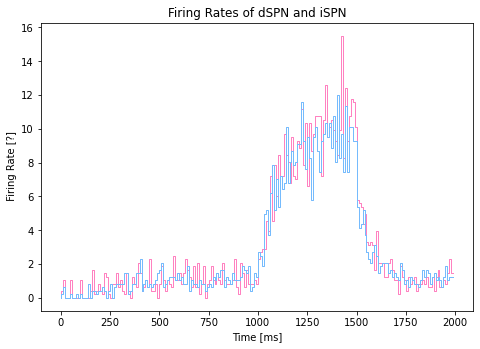

In [11]:
plotFR_2(time_1000, dspn_fr_1000, ispn_fr_1000, chin_fr_1000, lts_fr_1000, fs_fr_1000)

## C) 10.000 Network

### C.1) Neuronal Distribution

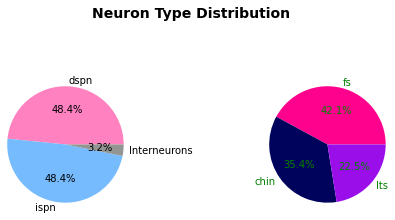

In [8]:
plotNeuronalDistribution('net_10000')

### C.2) Traces
we dont have the volt.txt file :(

In [ ]:
plotTraces('net_10000','R')

### C.3) Raster Plot

/home/ubuntu/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:134: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


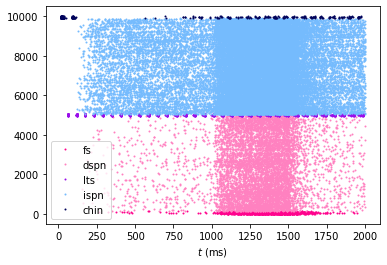

In [6]:
plotRaster('net_10000',10000)

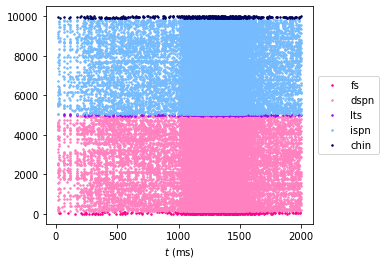

In [12]:
plotRaster('net_10000',10000)

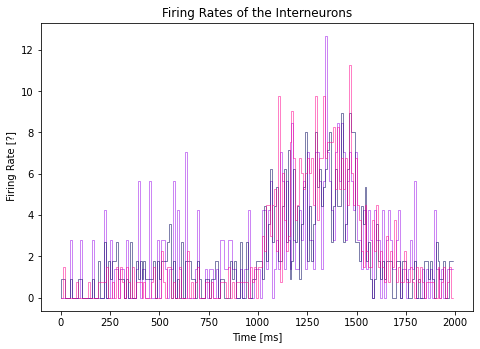

In [13]:
time_10k, dspn_fr_10k, ispn_fr_10k, chin_fr_10k, lts_fr_10k, fs_fr_10k = FiringRate('net_10000')
plotFR_1(time_10k, dspn_fr_10k, ispn_fr_10k, chin_fr_10k, lts_fr_10k, fs_fr_10k)

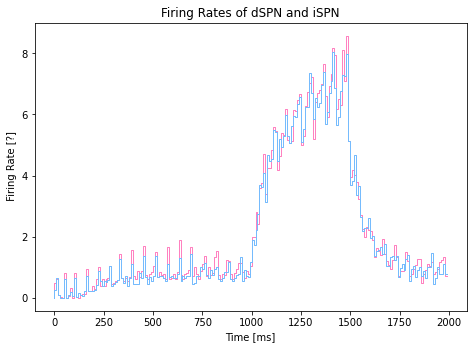

In [15]:
plotFR_2(time_10k, dspn_fr_10k, ispn_fr_10k, chin_fr_10k, lts_fr_10k, fs_fr_10k)

In [8]:
def FiringRate(net):

    neuron_IDs = getNeuronMatrix(net)

    file_path = '/home/ubuntu/BasalGanglia/NEURON-data/' + net + '/spikes.txt'

    dspn_spks = []
    ispn_spks = []
    lts_spks = []
    chin_spks = []
    fs_spks = []

    with open(file_path, 'r') as file:
        lines = file.readlines()

    spikes = {}

    for line in lines :

        split_line = np.array(line.split("\t"),float)
        nID = int(split_line[1])
        spike_time = split_line[0]

        if neuron_IDs[nID][1] == 'dspn':
            dspn_spks.append(spike_time)

        elif neuron_IDs[nID][1] == 'ispn':
            ispn_spks.append(spike_time)

        elif neuron_IDs[nID][1] == 'fs':
            fs_spks.append(spike_time)

        elif neuron_IDs[nID][1] == 'chin':
            chin_spks.append(spike_time)

        elif neuron_IDs[nID][1] == 'lts':
            lts_spks.append(spike_time)

    dspn_spikes_dt = []
    ispn_spikes_dt = []
    chin_spikes_dt = []
    lts_spikes_dt = []
    fs_spikes_dt = []

    for d_time in range (0, 1991, 10):

        start = d_time
        stop = d_time + 10
        spikes_dt_aux = [0,0,0,0,0]

        for elem in dspn_spks:
            if (start < elem <= stop):
                spikes_dt_aux[0] +=1
        for elem in ispn_spks:
            if (start < elem <= stop):
                spikes_dt_aux[1] +=1
        for elem in chin_spks:
            if (start < elem <= stop):
                spikes_dt_aux[2] +=1
        for elem in lts_spks:
            if (start < elem <= stop):
                spikes_dt_aux[3] +=1
        for elem in fs_spks:
            if (start < elem <= stop):
                spikes_dt_aux[4] +=1

        dspn_spikes_dt.append(spikes_dt_aux[0])
        ispn_spikes_dt.append(spikes_dt_aux[1])
        chin_spikes_dt.append(spikes_dt_aux[2])
        lts_spikes_dt.append(spikes_dt_aux[3])
        fs_spikes_dt.append(spikes_dt_aux[4])

    dspn, ispn, lts, fs, chin = getNeuronSubMatrixes(neuron_IDs)
    N_dspn = len(dspn)
    N_ispn = len(ispn)
    N_chin = len(chin)
    N_lts= len(lts)
    N_fs = len(fs)

    dspn_fr = []
    ispn_fr = []
    chin_fr = []
    lts_fr = []
    fs_fr = []

    for elem in dspn_spikes_dt:
        dspn_fr.append(elem*100/(N_dspn))
    for elem in ispn_spikes_dt:
        ispn_fr.append(elem*100/(N_ispn))
    for elem in chin_spikes_dt:
        chin_fr.append(elem*100/(N_chin))
    for elem in lts_spikes_dt:
        lts_fr.append(elem*100/(N_lts))
    for elem in fs_spikes_dt:
        fs_fr.append(elem*100/(N_fs))

    time = []
    for d_time in range (0, 1991, 10):
        time.append(d_time)
        
    return(time, dspn_fr, ispn_fr, chin_fr, lts_fr, fs_fr)


def plotFR_1(time, dspn_fr, ispn_fr, chin_fr, lts_fr, fs_fr):
    
    chin_color='xkcd:dark blue'
    ispn_color='xkcd:sky blue'
    lts_color='xkcd:violet'
    dspn_color='xkcd:pink'
    fs_color='xkcd:hot pink'

    
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.set_title("Firing Rates of the Interneurons")
    ax.set_xlabel('Time [ms]')
    ax.set_ylabel(' Firing Rate [?]')
    plt.step(time, lts_fr, color = lts_color, linewidth=0.5)
    plt.step(time, chin_fr, color = chin_color, linewidth=0.5)
    plt.step(time, fs_fr, color = fs_color, linewidth=0.5)


    plt.show()
    
    return


def plotFR_2(time, dspn_fr, ispn_fr, chin_fr, lts_fr, fs_fr):
    
    chin_color='xkcd:dark blue'
    ispn_color='xkcd:sky blue'
    lts_color='xkcd:violet'
    dspn_color='xkcd:pink'
    fs_color='xkcd:hot pink'

    
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    plt.step(time, dspn_fr, color = dspn_color, linewidth=1)
    plt.step(time, ispn_fr, color = ispn_color, linewidth=1)
    ax.set_title("Firing Rates of dSPN and iSPN")
    ax.set_xlabel('Time [ms]')
    ax.set_ylabel(' Firing Rate [?]')

    plt.show()
    
    return


